## Моделирование молекулярной динамики

   - Система: ГЦК решётка $7\times7\times7$ частиц;
   - Постоянная решётки: $a = 1.75~\sigma $;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Начальная температура: $T_i = 10^{-10}~\varepsilon / k_B$;
   - Конечная температура: $T_f = 2.8~\varepsilon / k_B$;
   - Скорость охлаждения: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число шагов для охлаждения: 40000;
   - Функция радиального распределения, среднеквадратичное смещение и коэффициент самодиффузии рассчитывалась через каждые 5000 шагов;
   - Подсчёт состоял из 1500 шагов: 500 на уравновешивание системы при фиксированной температуре и 1000 на усреднение по времени и подсчёт функции радиального распределения;
   - Среднеквадратичное смещение и коэффициент самодиффузии вычислялись в течение всех 1500 шагов;

#### Импорт необходимых библиотек

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

#### Путь к файлам с данными

In [2]:
BASE_DIRECTORY = os.path.dirname(os.getcwd())
PATH_TO_ALL_DATA = os.path.join(BASE_DIRECTORY, 'data')
PATH_TO_CURRENT_DATA = os.path.join(PATH_TO_ALL_DATA, '2020-12-19')

In [3]:
rdf_filename = os.path.join(PATH_TO_CURRENT_DATA, 'rdf_T_')
transport_filename = os.path.join(PATH_TO_CURRENT_DATA, 'transport_T_')
parameters_filename = os.path.join(PATH_TO_CURRENT_DATA, 'system_parameters.csv')

#### Температуры, для которых была подчитана функция радиального распределения

In [4]:
temperatures = (
    0.00010,
    0.10027,
    0.49913,
    0.99809,
    1.49964,
    2.00553,
    2.49476,
    2.79752,
#     2.80344,
#     2.80713,
)

#### Извлечение значений функции радиального распределения из файлов

In [5]:
rdf_data = pd.DataFrame(columns=['radius'])
msd_data = pd.DataFrame()
diffusion_data = pd.DataFrame()

for temperature in temperatures:
    df = pd.read_csv(
        f'{rdf_filename}{temperature:.5f}.csv',
        sep=';',
    )
    rdf_data = rdf_data.merge(
        right=df,
        how='outer',
        on='radius',
    )
    df = pd.read_csv(
        f'{transport_filename}{temperature:.5f}.csv',
        sep=';',
    )
    msd_data = pd.concat(
        [msd_data, df['msd']],
        axis=1,
    )
    diffusion_data = pd.concat(
        [diffusion_data, df['diffusion']],
        axis=1,
    )
    rdf_data = rdf_data.rename(columns={'rdf': f'{temperature:.5f}'})
    msd_data = msd_data.rename(columns={'msd': f'{temperature:.5f}'})
    diffusion_data = diffusion_data.rename(columns={'diffusion': f'{temperature:.5f}'})
    
msd_data['time'] = msd_data.index.values * 0.005
diffusion_data['time'] = diffusion_data.index.values * 0.005

msd_data

,0.00010,0.10027,0.49913,0.99809,1.49964,2.00553,2.49476,2.79752,time
0,7.499585e-09,0.000008,0.000037,0.000075,0.000113,0.000151,0.000187,0.000210,0
1,7.511458e-09,0.000030,0.000150,0.000299,0.000450,0.000602,0.000747,0.000838,0.005
2,2.984892e-08,0.000068,0.000336,0.000672,0.001008,0.001347,0.001674,0.001878,0.01
3,2.986639e-08,0.000120,0.000595,0.001190,0.001785,0.002382,0.002961,0.003321,0.015
4,6.336662e-08,0.000187,0.000925,0.001851,0.002773,0.003696,0.004595,0.005154,0.02
...,...,...,...,...,...,...,...,...,...
1495,5.943095e-03,0.624078,0.306441,4.273462,5.935112,7.857779,9.902403,11.204173,7.475
1496,5.960052e-03,0.624157,0.306620,4.275210,5.939381,7.861709,9.909940,11.212198,7.48
1497,5.964512e-03,0.624237,0.306802,4.276928,5.943676,7.865563,9.917278,11.220231,7.485
1498,5.981506e-03,0.624315,0.306988,4.278623,5.947989,7.869379,9.924420,11.228272,7.49


#### Графики функций радиального распределения при различных температурах

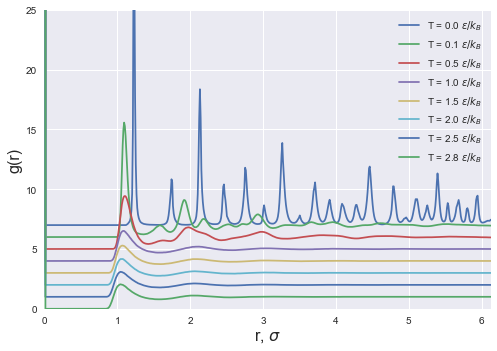

In [6]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        rdf_data['radius'],
        rdf_data[f'{temperature:.5f}'] + 1 * (len(temperatures) - (i + 1)), 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel('r, $\sigma$', fontsize=16);
plt.ylabel('g(r)', fontsize=16);
plt.xlim(left=0, right=6.125);
plt.ylim(
    bottom=0, 
    top=25,
);
plt.legend();

#### Временная зависимость среднеквадратичного смещения при различных температурах

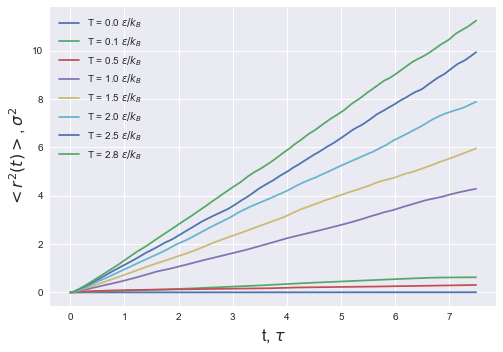

In [7]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        msd_data['time'],
        msd_data[f'{temperature:.5f}'], 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel(r't, $\tau $', fontsize=16);
plt.ylabel(r'$<r^2(t)>$, $\sigma^2$', fontsize=16);
plt.xlim(
#     left=0, 
#     right=6.125,
);
plt.ylim(
#     bottom=0, 
#     top=20,
);
plt.legend();

#### Временная зависимость коэффициента самодиффузии при различных температурах

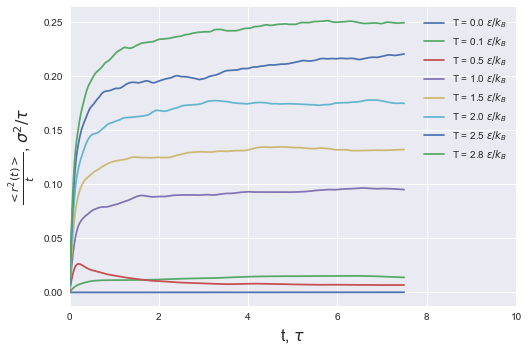

In [8]:
for i, temperature in enumerate(temperatures):
    diff_data = diffusion_data[f'{temperature:.5f}']
    plt.plot(
        diffusion_data['time'],
        diff_data, 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel(r't, $\tau$', fontsize=16);
plt.ylabel(r'$\frac{<r^2(t)>}{t}$, $\sigma^2 / \tau$', fontsize=16);
plt.xlim(
    left=0, 
    right=10,
);
plt.ylim(
#     bottom=0, 
#     top=0.1,
);
plt.legend();

#### Извлечение параметров системы из файла

In [9]:
system_parameters = pd.read_csv(parameters_filename, sep=';')

for column in system_parameters.columns:
    system_parameters[column] = system_parameters[column].round(5)

system_parameters

,temperature,pressure,system_kinetic_energy,potential_energy,total_energy,virial,msd,diffusion
0,0.00010,-2.93926,0.20579,-7985.80600,-7985.80600,-16209.44200,0.00000,0.00000
1,0.00020,-2.93916,0.41154,-7985.09284,-7984.88705,-16209.27083,0.00000,0.00000
2,0.00030,-2.93909,0.61716,-7985.09738,-7984.68585,-16209.28130,0.00000,0.00000
3,0.00040,-2.93900,0.82268,-7985.05805,-7984.44089,-16209.23880,0.00000,0.00000
4,0.00050,-2.93893,1.02810,-7985.12932,-7984.30663,-16209.25222,0.00000,0.00000
...,...,...,...,...,...,...,...,...
39995,2.79596,4.56123,5754.09510,-5035.17582,719.97758,13643.96818,197.51685,0.16461
39996,2.79663,4.56845,5755.45675,-5028.14240,725.95271,13685.87668,197.52325,0.16462
39997,2.79834,4.57202,5758.97380,-5025.13862,730.31813,13702.87213,197.52907,0.16462
39998,2.79880,4.57491,5759.93763,-5023.00244,735.97136,13711.77919,197.53398,0.16462


In [10]:
times = (system_parameters.index + 1) * 0.005

#### Зависимость температуры системы от времени

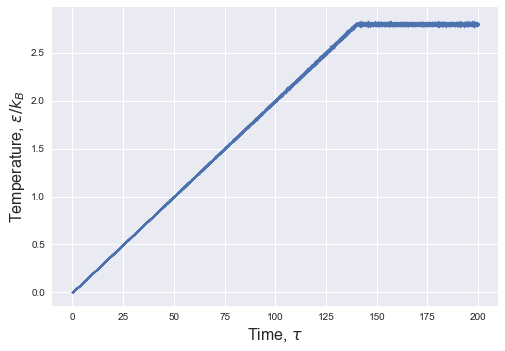

In [11]:
plt.scatter(
    times,
    system_parameters['temperature'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Temperature, $\epsilon / k_B$', fontsize=16);

plt.ylim(
#     bottom=2.75,
#     top=2.85,
);

#### Зависимость давления системы от времени

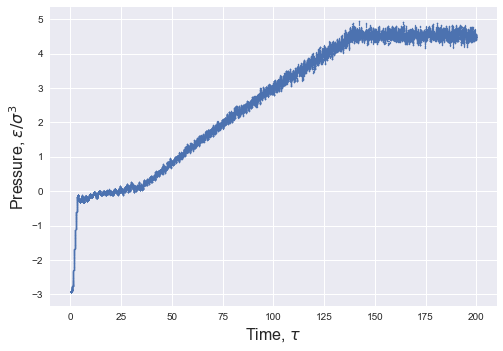

In [12]:
plt.scatter(
    times,
    system_parameters['pressure'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Pressure, $\epsilon / \sigma^3 $', fontsize=16);

plt.ylim(
#     bottom=3.5,
#     top=5.5,
);

#### Зависимость кинетической энергии системы от времени

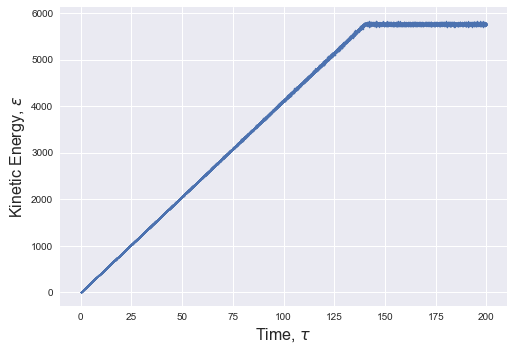

In [13]:
plt.scatter(
    times,
    system_parameters['system_kinetic_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Kinetic Energy, $\epsilon$', fontsize=16);

# plt.ylim(
#     bottom=-6000,
#     top=4000,
# );

#### Зависимость потенциальной энергии системы от времени

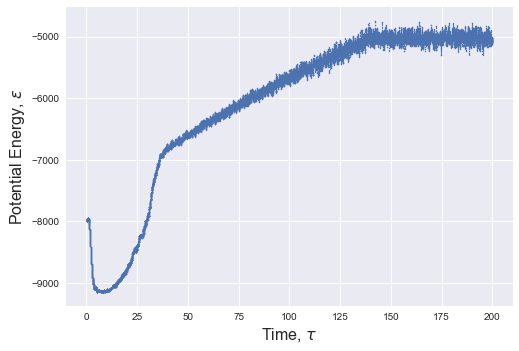

In [14]:
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Potential Energy, $\epsilon$', fontsize=16);

plt.ylim(
#     bottom=-6000,
#     top=4000,
);

#### Зависимость полной энергии системы от времени

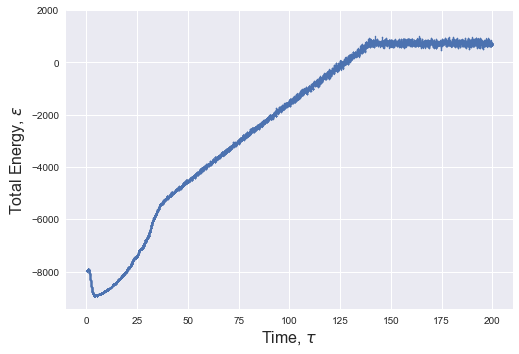

In [15]:
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Total Energy, $\epsilon$', fontsize=16);

plt.ylim(
#     bottom=-6000,
    top=2000,
);

#### Энергии на одном графике

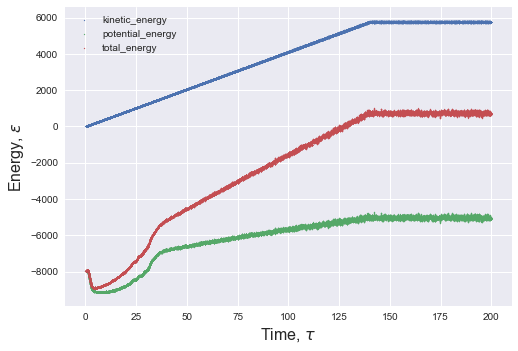

In [16]:
plt.scatter(
    times,
    system_parameters['system_kinetic_energy'],
    s=1,
    label='kinetic_energy',
);
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
    label='potential_energy',
);
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
    label='total_energy',
);

plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Energy, $\epsilon$', fontsize=16);
plt.legend();

plt.ylim(
#     bottom=-6000,
#     top=2000,
);